In [5]:
import numpy as np

def add_gaussian_noise(data, mean=0, std=1):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

In [6]:
import PIL.Image as Image

In [7]:
def add_noise(img_path, output_path, mean=0, std=10):
    img = np.array(Image.open(img_path))
    noisy_img = add_gaussian_noise(img, mean, std)
    noisy_img = noisy_img/255
    noisy_img = (np.clip(noisy_img, 0, 1)*255).astype(np.uint8)
    pil_img = Image.fromarray(noisy_img)
    pil_img.save(output_path)


In [13]:
img_path = r"C:\Users\user1\Desktop\abstract\cbct_2BB049_67.png"
output_path = r"C:\Users\user1\Desktop\abstract\cbct_2BB049_67_noisy.png"
add_noise(img_path, output_path, mean=0, std=30)

In [15]:
img_path = r"C:\Users\user1\Desktop\abstract\cbct_2BB049_67.png"
output_path = r"C:\Users\user1\Desktop\abstract\cbct_2BB049_67_noisy_1.png"
add_noise(img_path, output_path, mean=0, std=15)

In [14]:
img_path = r"C:\Users\user1\Desktop\abstract\ct_2BB049_67.png"
output_path = r"C:\Users\user1\Desktop\abstract\ct_2BB049_67_noisy.png"
add_noise(img_path, output_path, mean=0, std=30)

In [16]:
img_path = r"C:\Users\user1\Desktop\abstract\ct_2BB049_67.png"
output_path = r"C:\Users\user1\Desktop\abstract\ct_2BB049_67_noisy_1.png"
add_noise(img_path, output_path, mean=0, std=15)

### 결과 이미지 plot

In [2]:
import os
base_path = r'C:\Users\user1\Desktop\IEEE NPSS Seoul Chapter Abstract\ex'
case = os.listdir(base_path)
print(case)

img_11 = sorted(os.listdir(os.path.join(base_path, case[0])))
img_22 = sorted(os.listdir(os.path.join(base_path, case[1])))

print(img_11)
print(img_22)

img1 = []
img1.append(img_11[1])
img1.append(img_11[0])
img1.append(img_11[4])
img1.append(img_11[3])

img2 = []
img2.append(img_22[1])
img2.append(img_22[0])
img2.append(img_22[4])
img2.append(img_22[3])

print(img1)
print(img2)
# 1, 0, 3, 2

['2BB071_69', '2BB145_67']
['cbct_2BB071_69.npy', 'ct_2BB071_69.npy', 'sct_2BB071_69.npy', 'sct_2BB071_69_2.npy', 'sct_unet_2BB071_69.npy']
['cbct_2BB145_67.npy', 'ct_2BB145_67.npy', 'sct_2BB145_67.npy', 'sct_2BB145_67_2.npy', 'sct_unet_2BB145_67.npy']
['ct_2BB071_69.npy', 'cbct_2BB071_69.npy', 'sct_unet_2BB071_69.npy', 'sct_2BB071_69_2.npy']
['ct_2BB145_67.npy', 'cbct_2BB145_67.npy', 'sct_unet_2BB145_67.npy', 'sct_2BB145_67_2.npy']


In [3]:
import numpy as np
import PIL.Image as Image

for aa, bb in zip(img1, img2):
    img1_path = os.path.join(base_path, case[0], aa)
    img2_path = os.path.join(base_path, case[1], bb)
    img1_array = np.load(img1_path)
    img2_array = np.load(img2_path)
    print(img1_array.max(), img1_array.min())
    print(img2_array.max(), img2_array.min())
    
    # max_value, min_value = 3000, -1024
    # img1 = (img1 - min_value)/(max_value - min_value)
    # img2 = (img2 - min_value)/(max_value - min_value)
        
    # img1 = (np.clip(img1, 0, 1)*255).astype(np.uint8)
    # img2 = (np.clip(img2, 0, 1)*255).astype(np.uint8)
    # pil_img1 = Image.fromarray(img1)
    # pil_img2 = Image.fromarray(img2)
    # img1_path = img1_path[:-4] + '.png'
    # img2_path = img2_path[:-4] + '.png'
    # pil_img1.save(img1_path)
    # pil_img2.save(img2_path)

2758.6372 -1024.0
1706.081 -1019.33984
1986.1609 -1000.0
1993.4304 -1000.0
1937.4658 -1024.0
1916.7441 -1024.0
2048.76 -1024.0
2296.6885 -1024.0


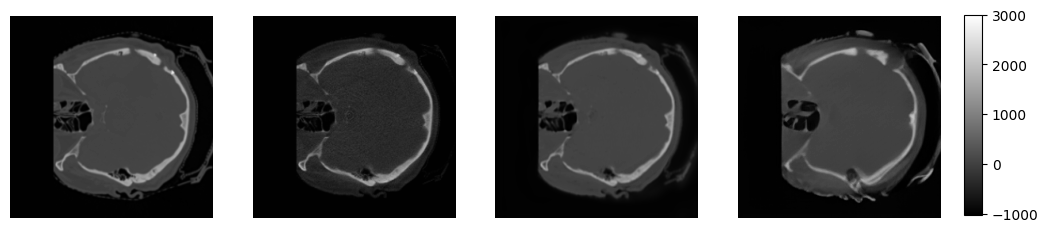

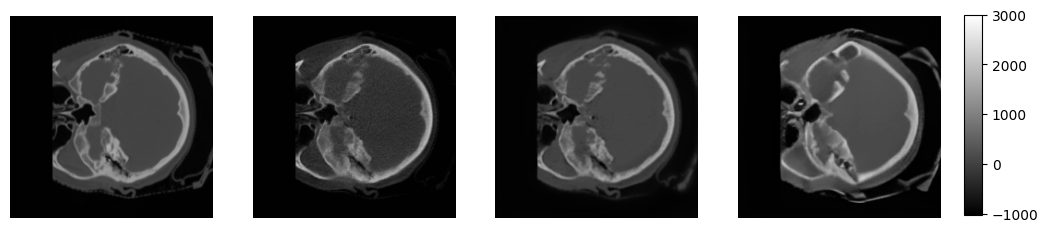

In [4]:
import matplotlib.pyplot as plt

for i in range(2):
    vmin = -1024 
    vmax = 3000 

    # Figure 및 서브플롯 생성
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # 컬러바 위치 설정
       
    images=[] 
    for j in range(4):
        img = img1 if i == 0 else img2
        img_path = os.path.join(base_path, case[i], img[j])
        array = np.load(img_path)
    
        
        im = axes[j].imshow(array[:,:,0], cmap='gray', vmin=vmin, vmax=vmax)
        axes[j].axis('off')
        images.append(im)

        # 하나의 컬러바 추가 (세 개 이미지의 공통 범위 적용)
    fig.colorbar(images[0], cax=cax)

    plt.show()

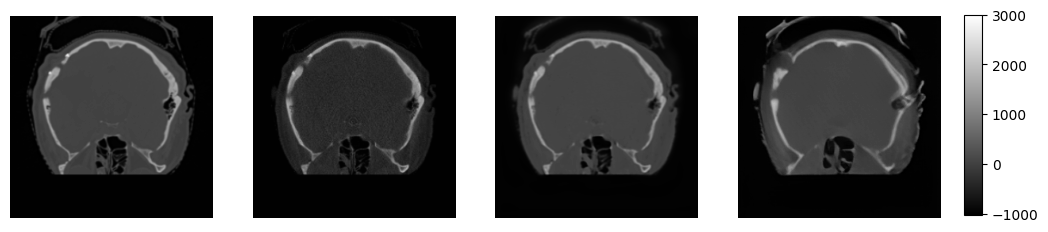

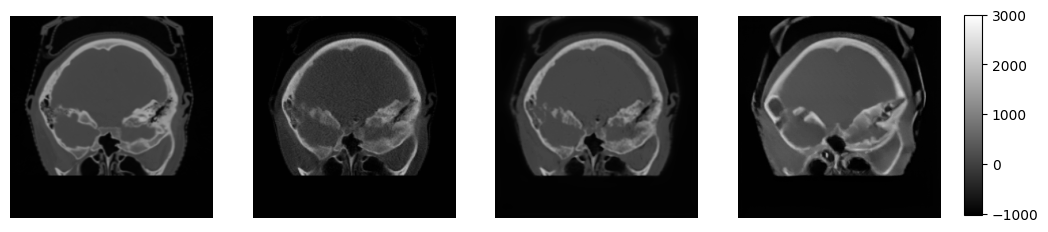

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

for i in range(2):
    vmin = -1024 
    vmax = 3000 

    # Figure 및 서브플롯 생성
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # 컬러바 위치 설정
       
    images = [] 
    for j in range(4):
        img = img1 if i == 0 else img2
        img_path = os.path.join(base_path, case[i], img[j])
        array = np.load(img_path)

        # 90도 반시계 방향으로 회전
        rotated_array = np.rot90(array[:, :, 0])

        im = axes[j].imshow(rotated_array, cmap='gray', vmin=vmin, vmax=vmax)
        axes[j].axis('off')
        images.append(im)

    # 하나의 컬러바 추가 (세 개 이미지의 공통 범위 적용)
    fig.colorbar(images[0], cax=cax)

    plt.show()


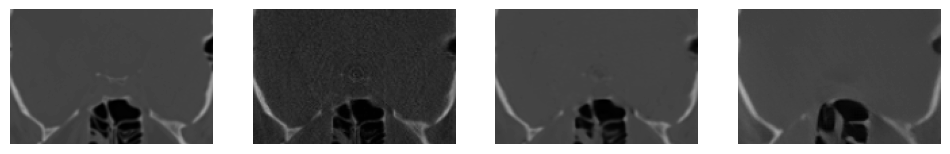

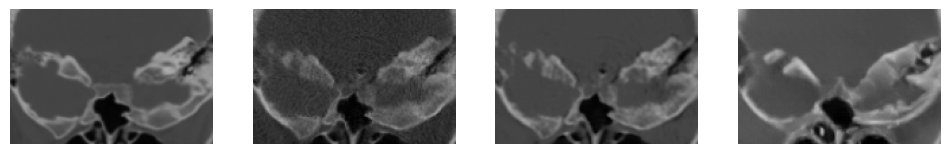

In [9]:
# 위의 cell에서 crop 버전

for i in range(2):
    vmin = -1024 
    vmax = 3000 

    # Figure 및 서브플롯 생성 
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
       
    images=[] 
    for j in range(4):
        img = img1 if i == 0 else img2
        img_path = os.path.join(base_path, case[i], img[j])
        array = np.load(img_path)
    
        
        im = axes[j].imshow(np.rot90(array[:,:,0][50:200,70:170]), cmap='gray', vmin=vmin, vmax=vmax)
        axes[j].axis('off')
        images.append(im)

        # 하나의 컬러바 추가 (세 개 이미지의 공통 범위 적용)
    fig.colorbar(images[0], cax=cax)

    plt.show()

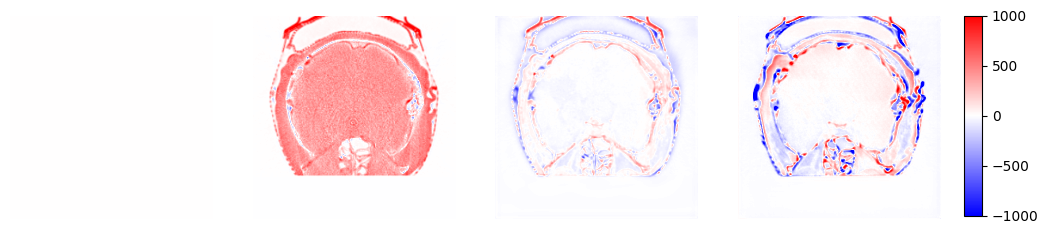

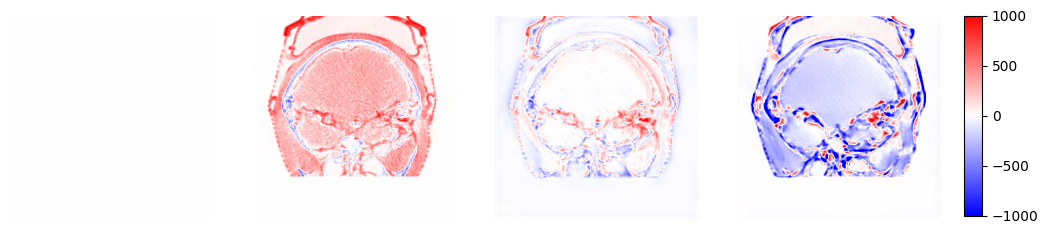

In [7]:
import matplotlib.pyplot as plt

for i in range(2):
    vmin = -1000
    vmax = 1000

    # Figure 및 서브플롯 생성
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.5])  # 컬러바 위치 설정
       
    images=[] 
    img = img1 if i == 0 else img2

    nn = img[0]
    base = np.load(os.path.join(base_path, case[i], nn)) [:,:,0]
    
    default = np.zeros_like(base)
    im = axes[0].imshow(default, cmap='bwr', vmin=vmin, vmax=vmax)
    axes[0].axis('off')
    images.append(default)
    
    for j in range(3):
        img_path = os.path.join(base_path, case[i], img[j+1])
        image = np.load(img_path)[:,:,0]

        image = base - image
        iamge = np.clip(image, vmin,vmax)
        rotated_image = np.rot90(image)

        im = axes[j+1].imshow(rotated_image, cmap= 'bwr', vmin=vmin, vmax=vmax)
        axes[j+1].axis('off')
        images.append(im)

        # 하나의 컬러바 추가 (세 개 이미지의 공통 범위 적용)
    fig.colorbar(images[1], cax=cax)

    plt.show()

In [67]:
val = r'data\Task2\brain_data_npy\val\A'
test = r'data\Task2\brain_data_npy\test\A'

import os
print(len(os.listdir(val)))
print(len(os.listdir(test)))

720
720
